(402, 402)
(401, 401) (401, 401) (401, 401) (401, 401)
[[ 5.26646057e-16+0.j  8.29339272e-16+0.j  1.09087508e-15+0.j ...
  -7.78316206e-16+0.j -5.19183626e-16+0.j -2.55193516e-16+0.j]
 [ 1.09800353e-15+0.j  1.64328966e-15+0.j  2.19692583e-15+0.j ...
  -1.54089695e-15+0.j -1.03276079e-15+0.j -5.08011543e-16+0.j]
 [ 1.65238402e-15+0.j  2.49458821e-15+0.j  3.32477754e-15+0.j ...
  -2.33321833e-15+0.j -1.55206950e-15+0.j -7.76670372e-16+0.j]
 ...
 [-9.45761933e-15+0.j -1.42755313e-14+0.j -1.91423644e-14+0.j ...
   1.31021062e-14+0.j  8.68824518e-15+0.j  4.33889633e-15+0.j]
 [-7.01083471e-15+0.j -1.05316568e-14+0.j -1.41324753e-14+0.j ...
   9.69194655e-15+0.j  6.43108981e-15+0.j  3.19982480e-15+0.j]
 [-4.59982004e-15+0.j -6.95439295e-15+0.j -9.31967275e-15+0.j ...
   6.36006806e-15+0.j  4.22183508e-15+0.j  2.09154684e-15+0.j]]


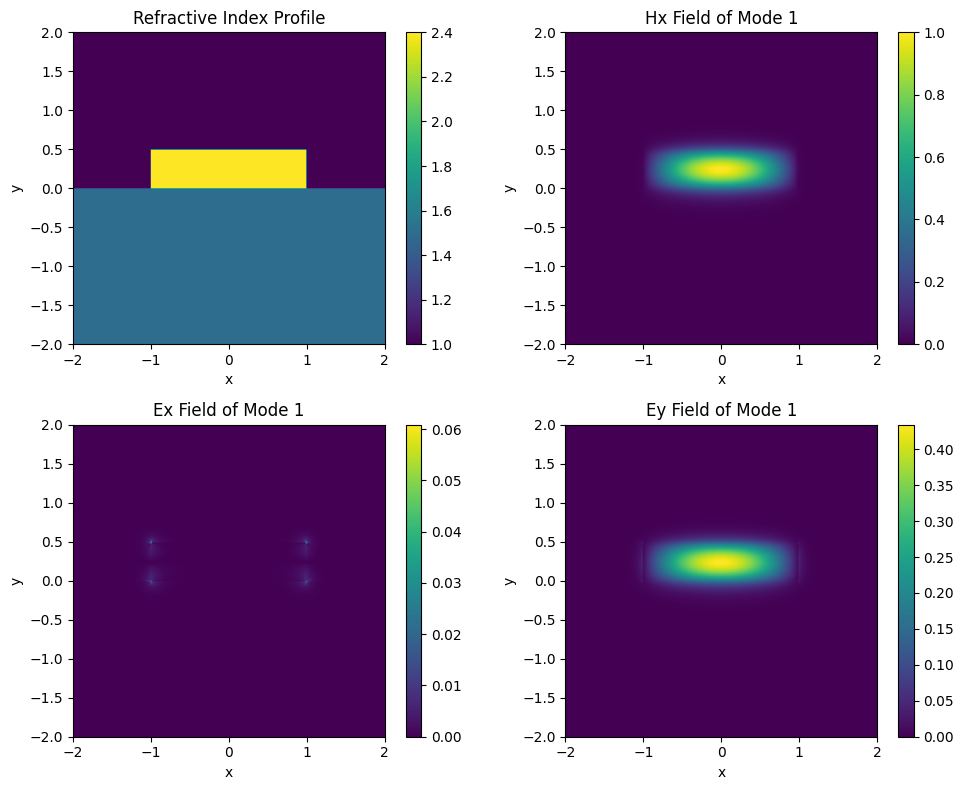

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from syuron import wgmodes

# Wavelength
lambda_ = 0.92  # Wavelength is set to double the fundamental wavelength

# Grid size
dx = 0.01
dy = 0.01

# x and y ranges
x = np.arange(-2, 2 + dx, dx)
y = np.arange(-2, 2 + dy, dy)

# Generate meshgrid
X, Y = np.meshgrid(x, y)

# Initialize refractive index profile
index = np.ones_like(X) * 1.0  # Initialize to 1.0

# Set index where Y < 0 to 1.5
index[Y < 0] = 1.5

# Set index where Y >= 0, Y < 0.5, and abs(X) < 1 to 2.4
mask = (Y >= 0) & (Y < 0.5) & (np.abs(X) < 1)
index[mask] = 2.4

# Compute epsilon_r (relative permittivity)
epsilon_r = index ** 2

# Guess for effective index (maximum refractive index)
guess = np.max(index)

# Number of modes to compute
nmodes = 5

# Boundary conditions
boundary = '0000'  # This is fixed as per your code

# Mode number to select (e.g., 1)
mode = 1

# Compute modes using wgmodes
Hx, Hy, neff = wgmodes.wgmodes(
    lambda_, guess, nmodes, dx, dy, epsilon_r, boundary)

# Post-process to compute the electric fields
Hz, Ex, Ey, Ez = wgmodes.postprocess(
    lambda_, neff[mode-1], Hx[:, :, mode-1], Hy[:, :, mode-1], dx, dy, epsilon_r, boundary)

# Normalize fields
ex, ey, ez, hx, hy, hz = wgmodes.normalize(
    dx, dy, Ex, Ey, Ez, Hx[:, :, mode-1], Hy[:, :, mode-1], Hz)

# Create a single figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Subplot 1: Refractive Index Profile
im1 = axs[0, 0].imshow(index, extent=[x.min(), x.max(),
                       y.min(), y.max()], origin='lower')
axs[0, 0].set_title('Refractive Index Profile')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
plt.colorbar(im1, ax=axs[0, 0])
axs[0, 0].set_aspect('equal')

# Subplot 2: Hx Field of the selected mode
im2 = axs[0, 1].imshow(np.abs(Hx[:, :, mode-1]),
                       extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
axs[0, 1].set_title(f'Hx Field of Mode {mode}')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
plt.colorbar(im2, ax=axs[0, 1])
axs[0, 1].set_aspect('equal')

# Subplot 3: Ex Field of the selected mode
im3 = axs[1, 0].imshow(np.abs(Ex), extent=[
                       x.min(), x.max(), y.min(), y.max()], origin='lower')
axs[1, 0].set_title(f'Ex Field of Mode {mode}')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
plt.colorbar(im3, ax=axs[1, 0])
axs[1, 0].set_aspect('equal')

# Subplot 4: Ey Field of the selected mode
im4 = axs[1, 1].imshow(np.abs(Ey), extent=[
                       x.min(), x.max(), y.min(), y.max()], origin='lower')
axs[1, 1].set_title(f'Ey Field of Mode {mode}')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
plt.colorbar(im4, ax=axs[1, 1])
axs[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()